In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df = pd.read_csv('C:/Users/aditi/Downloads/Class9/Class9/Exercises/music_popularity.csv')
df.dropna(how="any")
from sklearn.model_selection import train_test_split

# Split data into train and test sets (30% Train, 70% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)




In [24]:
result=df.dtypes
print(result)


track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["track_id"]=le.fit_transform(df["track_id"])
df["track_artist"]=le.fit_transform(df["track_artist"])
df["playlist_genre"]=le.fit_transform(df["playlist_genre"])
df["playlist_subgenre"]=le.fit_transform(df["playlist_subgenre"])
df.dtypes



track_id                      int64
track_name                   object
track_artist                  int64
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre                int32
playlist_subgenre             int32
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [43]:
#df.drop(labels=['track_name','track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id'])
df=df[["track_popularity","track_artist","playlist_genre","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]
df.head()
df_drop=df.drop(labels=['sales','salary'],axis=1)
df_drop.head()

,track_popularity,track_artist,playlist_genre,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2782,2,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,6084,2,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,10416,2,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,9215,2,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,5402,2,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [44]:
df.dtypes

track_popularity      int64
track_artist          int64
playlist_genre        int32
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [55]:
cols=["track_popularity","track_artist","playlist_genre","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]
df=df.reindex(columns= cols)
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['track_popularity', 'track_artist', 'playlist_genre', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [56]:
df.shape

(32833, 13)

In [57]:
df.head()

,track_popularity,track_artist,playlist_genre,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2782,2,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,6084,2,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,10416,2,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,9215,2,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,5402,2,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [58]:
df.corr()

,track_popularity,track_artist,playlist_genre,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.004297,0.042438,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
track_artist,0.004297,1.000000,0.041890,-0.000094,-0.021692,0.020547,-0.028157,-0.008229,0.020985,0.005239,-0.007540,0.006445,-0.012944
playlist_genre,0.042438,0.041890,1.000000,-0.007412,-0.243377,0.065426,0.110447,0.094074,-0.170522,-0.009740,0.098330,-0.016678,0.105492
key,-0.000650,-0.000094,-0.007412,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139
loudness,0.057687,-0.021692,-0.243377,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058
mode,0.010637,0.020547,0.065426,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634
speechiness,0.006819,-0.028157,0.110447,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431
acousticness,0.085159,-0.008229,0.094074,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581
instrumentalness,-0.149872,0.020985,-0.170522,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235
liveness,-0.054584,0.005239,-0.009740,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138


Text(0.5, 1.0, 'Correlation between different fearures')

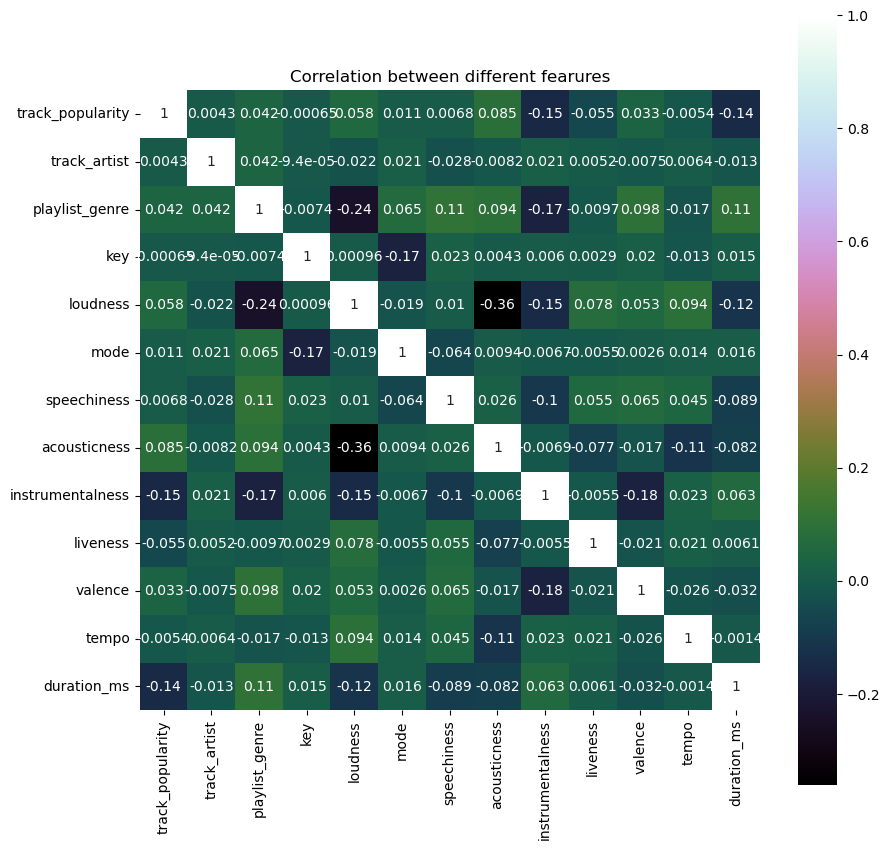

In [59]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [70]:
X = df.iloc[:,1:13].values # all rows, all the features and no labels
y = df.iloc[:, 0].values  # all rows, label only
#X
#y


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X_train_std)
X

array([[ 0.34938812,  0.92219394, -1.19616218, ..., -0.46425189,
         0.45874018,  0.00257181],
       [ 0.73843707,  0.92219394,  1.56007892, ...,  0.37230652,
        -0.58068067, -1.36800495],
       [ 0.15470168, -0.83223684, -1.19616218, ...,  1.80518092,
         0.86249446, -0.00316829],
       ...,
       [-0.51358138,  1.5070042 , -0.92053807, ..., -1.29223021,
         0.99219424,  2.4673404 ],
       [-0.44944176, -0.24742658,  0.45758248, ..., -0.69591422,
         0.75459108, -0.1870665 ],
       [-1.14299195,  1.5070042 , -0.92053807, ..., -0.34842072,
         1.45687432,  0.26742691]])

In [84]:
y

array([66, 67, 70, ..., 14, 15, 27], dtype=int64)

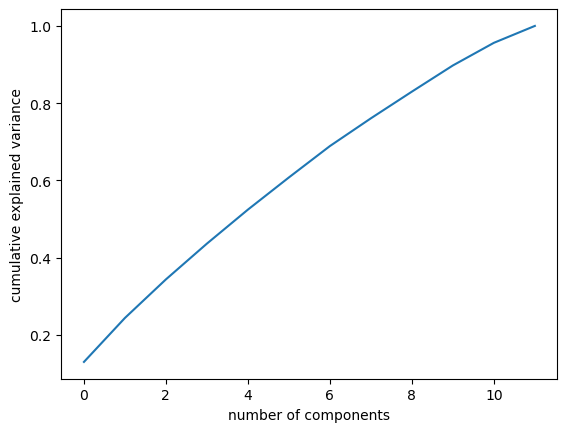

In [85]:
from sklearn.decomposition import PCA


pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [87]:
pca = PCA(9)  # project from 64 to 9 dimensions
projected = pca.fit_transform(X)